# LAB04 Linear-Regression
### 1.1 Load dataset & Import the required libraries


In [146]:
import warnings
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
california_housing.data.head()
#print(california_housing.data.info())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [147]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

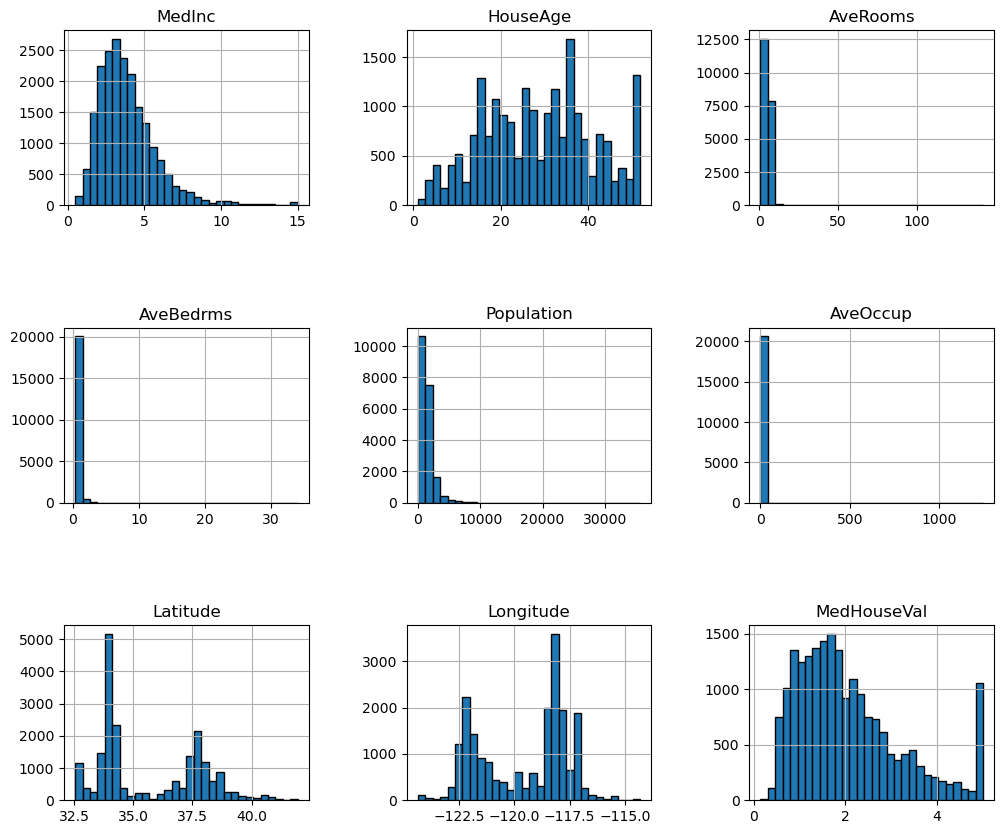

In [148]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

### 1.2 Preprocessing data

In [149]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
raw_data = california_housing.frame
columns_drop = ["Longitude", "Latitude"]
features = california_housing.frame.drop(columns=columns_drop)
#outliner treatment
import scipy.stats as stats
columns_feature = ['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
column_target = ['MedHouseVal']
features['MedInc_ZR'] = stats.zscore(features['MedInc'])
features['HouseAge_ZR'] = stats.zscore(features['HouseAge'])
features['AveRooms_ZR'] = stats.zscore(features['AveRooms'])
features['AveBedrms_ZR'] = stats.zscore(features['AveBedrms'])
features['Population_ZR'] = stats.zscore(features['Population'])
features['AveOccup_ZR'] = stats.zscore(features['AveOccup'])
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal,MedInc_ZR,HouseAge_ZR,AveRooms_ZR,AveBedrms_ZR,Population_ZR,AveOccup_ZR
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616


#### deal with out liner- Z-Score approach

In [150]:
print(features.shape)
features= features[(features['MedInc_ZR']>-3) & (features['MedInc_ZR']<3)]
features= features[(features['HouseAge_ZR']>-3) & (features['HouseAge_ZR']<3)]
features= features[(features['AveRooms_ZR']>-3) & (features['AveRooms_ZR']<3)]
features= features[(features['AveBedrms_ZR']>-3) & (features['AveBedrms_ZR']<3)]
features= features[(features['Population_ZR']>-3) & (features['Population_ZR']<3)]
features= features[(features['AveOccup_ZR']>-3) & (features['AveOccup_ZR']<3)].reset_index()
print(features.shape)

(20640, 13)
(19794, 14)


#### Data scaling

In [151]:
target = features[column_target]
features = features[columns_feature]

from sklearn.preprocessing import StandardScaler
#columns_feature = ['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
col_MinMax = ['HouseAge', 'AveRooms','AveBedrms','AveOccup']
col_STD = ['MedInc','Population']
features[col_STD] = StandardScaler().fit_transform(features[col_STD])
from sklearn.preprocessing import MinMaxScaler
features[col_MinMax] = MinMaxScaler().fit_transform(features[col_MinMax])


### 1.3 Split data -training set, validation set, test set

In [152]:
from sklearn.model_selection import train_test_split
x = features.copy()
y = target.copy()
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state = 42)


### 1.4 Training 

In [153]:
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('std_scaler', StandardScaler()),
    ('ridge', Ridge())
])
params = { 'poly__degree':[1, 2, 3, 4, 5],
'ridge__alpha':list(x / 10 for x in range(0, 120)),
          'ridge__max_iter':[5, 10, 15, 20, 100, 1000]}

#cv = 5 交叉验证5次
grid_search = GridSearchCV(model, param_grid=params, cv=5)
grid_search.fit(x_train, y_train)
print('The highest score of cross validation:{:.3f}\n'.format(grid_search.best_score_))
print('The best parameters:{}\n'.format( grid_search.best_params_))
print('The highest score:{:.3f}\n'.format(grid_search.score(x_test, y_test)))


The highest score of cross validation:0.623

The best parameters:{'poly__degree': 4, 'ridge__alpha': 10.3, 'ridge__max_iter': 5}

The highest score:0.652



In [154]:
def RMSE(y, y_pre) :
    y = np.array(y)
    y_pre = np.array(y_pre)
    return np.sqrt(np.mean((y - y_pre) ** 2))
def R2(y, y_pre) :
    y = np.array(y)
    y_pre = np.array(y_pre)
    u = np.sum((y - y_pre) ** 2)
    v = np.sum((y - np.mean(y)) ** 2)
    return 1-(u/v)

In [155]:
model_default = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('std_scaler', StandardScaler()),
    ('ridge', Ridge())
])

model_best = Pipeline([
    ('poly', PolynomialFeatures(degree= 4)),
    ('std_scaler', StandardScaler()),
    ('ridge', Ridge(alpha=10.3, max_iter=5))
])

model_default.fit(x_train, y_train)
model_best.fit(x_train, y_train)

y_predict_default = model_default.predict(x_test)

y_predict_best = model_best.predict(x_test)
print('the RMSE of model with default params: {:.3f}\n'.format(RMSE(y_test, y_predict_default)))

print('the R2 score of model with default params:{:.3f}\n '.format(R2(y_test, y_predict_default)))

print('the RMSE of model with best params: {:.3f}\n'.format(RMSE(y_test, y_predict_best)))

print('the R2 score of model with best params:{:.3f}\n '.format(R2(y_test, y_predict_best)))


the RMSE of model with default params: 0.691

the R2 score of model with default params:0.612
 
the RMSE of model with best params: 0.655

the R2 score of model with best params:0.652
 


### 2 Questions

1. Describe another real-world application where the regression method can be applied

   例如电商领域，将商品特征作为特征变量输入Regression模型中，确认商品特征变量中的特征变量，并利用模型来预测销售量与设计模型

2. What are the strengths of the linear/polynomial regression methods; when do they perform well?

   1.实现简单

   2.利用验证可以消除overfitting

   在相互线性独立的数据集上表现优良

3. What are the weaknesses of the linear/polynomial regression methods; when do they perform poorly?

   1.易发生underfitting

   2.受outliner影响大

   对于不相互独立的数据集，其表现差

4. What makes the linear regression method a good candidate for the regression problem, if you have enough knowledge about the data?

​	   1. 多元线性回归不同特征之间相互独立

   2. 变量x的分布有变异性
   
   3. 误差服从均值为零的正态分布